# 0. Setup Paths

In [166]:
import os
!cat /etc/os-release
!uname -m
import tensorflow as tf
print(tf.__version__)

NAME="Ubuntu"
VERSION="20.04.5 LTS (Focal Fossa)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 20.04.5 LTS"
VERSION_ID="20.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=focal
UBUNTU_CODENAME=focal
x86_64
2.13.0


In [167]:
CUSTOM_MODEL_NAME = 'my_ssd_mobilenet_v2_fpnlite_640x640' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [168]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [169]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [170]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [71]:
# clone tensorflow model API https://github.com/tensorflow/models.git
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
# Install Tensorflow Object Detection 
!apt-get install protobuf-compiler -y
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libprotobuf-dev libprotobuf-lite17 libprotobuf17 libprotoc17
The following NEW packages will be installed:
  libprotobuf-dev libprotobuf-lite17 libprotobuf17 libprotoc17
  protobuf-compiler
0 upgraded, 5 newly installed, 0 to remove and 96 not upgraded.
Need to get 2760 kB of archives.
After this operation, 16.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libprotobuf-lite17 amd64 3.6.1.3-2ubuntu5.2 [132 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libprotobuf17 amd64 3.6.1.3-2ubuntu5.2 [798 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libprotoc17 amd64 3.6.1.3-2ubuntu5.2 [646 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libprotobuf-dev amd64 3.6.1.3-2ubuntu5.2 [1156 kB]
Get:5 http://archive.ubuntu.com/ubuntu 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 102.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 43.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 49.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 112.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 80.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.0/619.0 kB 110.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 108.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 133.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 64.6 MB/s eta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 94.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 130.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 103.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 115.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 40.3 MB/s eta 0:00:00


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1696994 sha256=c19cb207c37a321b4a38ee573db2ba7fbd5ce471f11047cdd4730f3dca4a1c17
  Stored in directory: /tmp/pip-ephem-wheel-cache-kjk192kk/wheels/4e/dc/ef/bedf2bfbde4066a6000260cee7f357cca24bd684c6dfebb4aa
  Created wheel for avro-python3: filename=avro_python3-1.10.2-py3-none-any.whl size=44008 sha256=395a0594b02fe1fe0e8e625cfd3989551fb6783f2b912a893c95d048ded4e3b4
  Stored in directory: /root/.cache/pip/wheels/b0/49/56/bc5c2dc656062f0d08924771916c67e3202b6d2c415dcb7398
  Created wheel for crcmod: filename=crcmod-1.7-cp38-cp38-linux_x86_64.whl size=36028 sha256=e7995232ebb509af74f21521fd061a5e90c43b6b315fa49bb3a30ec0d6043024
  Stored in directory: /root/.cache/pip/wheels/f2/92/c3/6adef042a5224686e4ebdb9389aa568f1943c67abd8e05f7b9
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78542 sha256=71afc5a315288a13f6aad70ae0706d0f13c1bcfdf57ad2c91fe196097ff1cd83
  Stored in directory

In [133]:
import object_detection
import tensorflow as tf
print(tf.__version__)
print(object_detection.__file__)

2.13.0
/usr/local/lib/python3.8/dist-packages/object_detection/__init__.py


In [68]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-09-03 17:34:24.633511: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 17:34:29.670234: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Running tests under Python 3.8.10: /usr/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0903 17:34:29.719612 140619047651136 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fu

I0903 17:34:35.295335 140619047651136 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b0
I0903 17:34:35.295495 140619047651136 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 64
I0903 17:34:35.295551 140619047651136 ssd_efficientnet_bifpn_feature_extractor.py:153] EfficientDet BiFPN num iterations: 3
I0903 17:34:35.298858 140619047651136 efficientnet_model.py:143] round_filter input=32 output=32
I0903 17:34:35.332001 140619047651136 efficientnet_model.py:143] round_filter input=32 output=32
I0903 17:34:35.332319 140619047651136 efficientnet_model.py:143] round_filter input=16 output=16
I0903 17:34:35.414218 140619047651136 efficientnet_model.py:143] round_filter input=16 output=16
I0903 17:34:35.414370 140619047651136 efficientnet_model.py:143] round_filter input=24 output=24
I0903 17:34:35.606462 140619047651136 efficientnet_model.py:143] round_filter input=24 output=24
I0903 17:34:35.606610 140

I0903 17:34:39.402013 140619047651136 efficientnet_model.py:143] round_filter input=16 output=16
I0903 17:34:39.402165 140619047651136 efficientnet_model.py:143] round_filter input=24 output=24
I0903 17:34:39.679126 140619047651136 efficientnet_model.py:143] round_filter input=24 output=24
I0903 17:34:39.679281 140619047651136 efficientnet_model.py:143] round_filter input=40 output=48
I0903 17:34:39.973462 140619047651136 efficientnet_model.py:143] round_filter input=40 output=48
I0903 17:34:39.973630 140619047651136 efficientnet_model.py:143] round_filter input=80 output=88
I0903 17:34:40.573373 140619047651136 efficientnet_model.py:143] round_filter input=80 output=88
I0903 17:34:40.573544 140619047651136 efficientnet_model.py:143] round_filter input=112 output=120
I0903 17:34:40.967791 140619047651136 efficientnet_model.py:143] round_filter input=112 output=120
I0903 17:34:40.967956 140619047651136 efficientnet_model.py:143] round_filter input=192 output=208
I0903 17:34:41.468916 14

I0903 17:34:46.389195 140619047651136 efficientnet_model.py:143] round_filter input=112 output=160
I0903 17:34:46.389438 140619047651136 efficientnet_model.py:143] round_filter input=192 output=272
I0903 17:34:47.132295 140619047651136 efficientnet_model.py:143] round_filter input=192 output=272
I0903 17:34:47.132462 140619047651136 efficientnet_model.py:143] round_filter input=320 output=448
I0903 17:34:47.330178 140619047651136 efficientnet_model.py:143] round_filter input=1280 output=1792
I0903 17:34:47.372653 140619047651136 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.4, depth_coefficient=1.8, resolution=380, dropout_rate=0.4, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

I0903 17:34:56.565795 140619047651136 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b7
I0903 17:34:56.565942 140619047651136 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 384
I0903 17:34:56.565994 140619047651136 ssd_efficientnet_bifpn_feature_extractor.py:153] EfficientDet BiFPN num iterations: 8
I0903 17:34:56.568166 140619047651136 efficientnet_model.py:143] round_filter input=32 output=64
I0903 17:34:56.588196 140619047651136 efficientnet_model.py:143] round_filter input=32 output=64
I0903 17:34:56.588315 140619047651136 efficientnet_model.py:143] round_filter input=16 output=32
I0903 17:34:56.905928 140619047651136 efficientnet_model.py:143] round_filter input=16 output=32
I0903 17:34:56.906080 140619047651136 efficientnet_model.py:143] round_filter input=24 output=48
I0903 17:34:57.523227 140619047651136 efficientnet_model.py:143] round_filter input=24 output=48
I0903 17:34:57.523375 14

In [69]:
!pip list

Package                       Version
----------------------------- --------------------------
absl-py                       1.0.0
apache-beam                   2.49.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.2.1
astunparse                    1.6.3
attrs                         22.2.0
avro-python3                  1.10.2
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        6.0.0
cachetools                    5.2.0
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            3.0.1
clang                         13.0.1
click                         8.1.3
cloudpickle                   2.2.1
colorama                      0.4.6
comm                          0.1.4
contextlib2                   21.6.0
contourpy                     1.0.6
crcmod                        1.7
cubinlinker                   0.2.2+2.g8e13447
cuda-python        

In [7]:
# download pretained model - ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8
!wget {PRETRAINED_MODEL_URL}
!mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2023-08-25 12:26:57--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.209.144, 2a00:1450:4005:801::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.209.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20518283 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.57M  25.2MB/s    in 0.8s    

2023-08-25 12:26:59 (25.2 MB/s) - ‘ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz’ saved [20518283/20518283]

ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_640x640_coco17_

# 2. Create Label Map

In [171]:
# label_map.pbtxt
labels = [{'name':'animal', 'id':1}, {'name':'flat.driveable_surface', 'id':2}, {'name':'human.pedestrian.adult', 'id':3}, {'name':'human.pedestrian.child', 'id':4}, {'name':'human.pedestrian.construction_worker', 'id':5}, {'name':'human.pedestrian.personal_mobility', 'id':6}, {'name':'human.pedestrian.police_officer', 'id':7}, {'name':'human.pedestrian.stroller', 'id':8}, {'name':'human.pedestrian.wheelchair', 'id':9}, {'name':'movable_object.barrier', 'id':10}, {'name':'movable_object.debris', 'id':11}, {'name':'movable_object.pushable_pullable', 'id':12}, {'name':'movable_object.trafficcone', 'id':13}, {'name':'static_object.bicycle_rack', 'id':14}, {'name':'vehicle.bicycle', 'id':15}, {'name':'vehicle.bus.bendy', 'id':16}, {'name':'vehicle.bus.rigid', 'id':17}, {'name':'vehicle.car', 'id':18}, {'name':'vehicle.construction', 'id':19}, {'name':'vehicle.ego', 'id':20}, {'name':'vehicle.emergency.ambulance', 'id':21}, {'name':'vehicle.emergency.police', 'id':22}, {'name':'vehicle.motorcycle', 'id':23}, {'name':'vehicle.trailer', 'id':24}, {'name':'vehicle.truck', 'id':25}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [172]:
# generate_tfrecord.py
if not os.path.exists(os.path.join(paths['SCRIPTS_PATH'], 'generate_tfrecord.py')):
    !wget https://raw.githubusercontent.com/nicknochnack/GenerateTFRecord/main/generate_tfrecord.py -P {paths['SCRIPTS_PATH']}


In [173]:
#create TFrecord - val.record and train.record - from .xml annotation files
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'val')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'val.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/val.record


In [174]:
# understanding tfrecord
filenames = "/workspace/TFOD_nuScenes/Tensorflow/workspace/annotations/val.record"
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
print(example)

features {
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\010\006\006\007\006\005\010\007\007\007\t\t\010\n\014\024\r\014\013\013\014\031\022\023\017\024\035\032\037\036\035\032\034\034 $.\' \",#\034\034(7),01444\037\'9=82<.342\377\333\000C\001\t\t\t\014\013\014\030\r\r\0302!\034!22222222222222222222222222222222222222222222222222\377\300\000\021\010\003\204\006@\003\001\"\000\002\021\001\003\021\001\377\304\000\037\000\000\001\005\001\001\001\001\001\001\000\000\000\000\000\000\000\000\001\002\003\004\005\006\007\010\t\n\013\377\304\000\265\020\000\002\001\003\003\002\004\003\005\005\004\004\000\000\001}\001\002\003\000\004\021\005\022!1A\006\023Qa\007\"q\0242\201\221\241\010#B\261\301\025R\321\360$3br\202\t\n\026\027\030\031\032%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\203\204\205\206\207\210\211\212\222\223\224\225\226\227\230\231\232\242\243\244\245\246\247

# 4. Copy Model Config to Training Folder

In [175]:
# copy pipeline.config from ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8 to TFOD_nuScenes/Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite_640x640
!cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [176]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [177]:
#use config_util function from object_detection module to get configs from pipeline.config 
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [178]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [179]:
#read pipeline.config file from TFOD_nuScenes/Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite_640x640 and merge with configuration class 'TrainEvalPipelineConfig'
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [180]:
#update the configuration with corresponding config variables
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'val.record')]

In [181]:
#write the updated variables into pipeline.config file
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [182]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [183]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [184]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=13000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [185]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite_640x640 --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite_640x640/pipeline.config --num_train_steps=13000


In [186]:
!{command}

2023-09-09 21:17:24.910882: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-09 21:17:28.817144: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0909 21:17:28.830201 140254819370816 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting 

INFO:tensorflow:Step 100 per-step time 1.433s
I0909 21:20:32.869480 140254819370816 model_lib_v2.py:705] Step 100 per-step time 1.433s
INFO:tensorflow:{'Loss/classification_loss': 0.6282168,
 'Loss/localization_loss': 0.6877748,
 'Loss/regularization_loss': 0.1518616,
 'Loss/total_loss': 1.4678532,
 'learning_rate': 0.0319994}
I0909 21:20:32.870302 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.6282168,
 'Loss/localization_loss': 0.6877748,
 'Loss/regularization_loss': 0.1518616,
 'Loss/total_loss': 1.4678532,
 'learning_rate': 0.0319994}
INFO:tensorflow:Step 200 per-step time 1.076s
I0909 21:22:20.436898 140254819370816 model_lib_v2.py:705] Step 200 per-step time 1.076s
INFO:tensorflow:{'Loss/classification_loss': 0.71038187,
 'Loss/localization_loss': 0.790675,
 'Loss/regularization_loss': 0.15274999,
 'Loss/total_loss': 1.6538068,
 'learning_rate': 0.0373328}
I0909 21:22:20.437883 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.71038187,
 'Lo

INFO:tensorflow:Step 1700 per-step time 0.973s
I0909 21:47:24.996410 140254819370816 model_lib_v2.py:705] Step 1700 per-step time 0.973s
INFO:tensorflow:{'Loss/classification_loss': 0.4166288,
 'Loss/localization_loss': 0.36797827,
 'Loss/regularization_loss': 0.15823393,
 'Loss/total_loss': 0.942841,
 'learning_rate': 0.07995972}
I0909 21:47:24.996977 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.4166288,
 'Loss/localization_loss': 0.36797827,
 'Loss/regularization_loss': 0.15823393,
 'Loss/total_loss': 0.942841,
 'learning_rate': 0.07995972}
INFO:tensorflow:Step 1800 per-step time 1.015s
I0909 21:49:06.480901 140254819370816 model_lib_v2.py:705] Step 1800 per-step time 1.015s
INFO:tensorflow:{'Loss/classification_loss': 0.5662607,
 'Loss/localization_loss': 0.23035128,
 'Loss/regularization_loss': 0.15840845,
 'Loss/total_loss': 0.9550204,
 'learning_rate': 0.0799474}
I0909 21:49:06.481276 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.56626

INFO:tensorflow:Step 3200 per-step time 1.029s
I0909 22:12:12.566586 140254819370816 model_lib_v2.py:705] Step 3200 per-step time 1.029s
INFO:tensorflow:{'Loss/classification_loss': 0.38092256,
 'Loss/localization_loss': 0.35791472,
 'Loss/regularization_loss': 0.15387619,
 'Loss/total_loss': 0.8927134,
 'learning_rate': 0.07960275}
I0909 22:12:12.567020 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.38092256,
 'Loss/localization_loss': 0.35791472,
 'Loss/regularization_loss': 0.15387619,
 'Loss/total_loss': 0.8927134,
 'learning_rate': 0.07960275}
INFO:tensorflow:Step 3300 per-step time 0.981s
I0909 22:13:50.642215 140254819370816 model_lib_v2.py:705] Step 3300 per-step time 0.981s
INFO:tensorflow:{'Loss/classification_loss': 0.33611712,
 'Loss/localization_loss': 0.3421883,
 'Loss/regularization_loss': 0.15336533,
 'Loss/total_loss': 0.83167076,
 'learning_rate': 0.07956588}
I0909 22:13:50.642508 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0

INFO:tensorflow:Step 4700 per-step time 0.965s
I0909 22:37:30.172937 140254819370816 model_lib_v2.py:705] Step 4700 per-step time 0.965s
INFO:tensorflow:{'Loss/classification_loss': 0.3825805,
 'Loss/localization_loss': 0.3433196,
 'Loss/regularization_loss': 0.14758739,
 'Loss/total_loss': 0.8734875,
 'learning_rate': 0.07887978}
I0909 22:37:30.173231 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.3825805,
 'Loss/localization_loss': 0.3433196,
 'Loss/regularization_loss': 0.14758739,
 'Loss/total_loss': 0.8734875,
 'learning_rate': 0.07887978}
INFO:tensorflow:Step 4800 per-step time 1.028s
I0909 22:39:12.971956 140254819370816 model_lib_v2.py:705] Step 4800 per-step time 1.028s
INFO:tensorflow:{'Loss/classification_loss': 0.3850093,
 'Loss/localization_loss': 0.3308508,
 'Loss/regularization_loss': 0.14720616,
 'Loss/total_loss': 0.8630663,
 'learning_rate': 0.07881871}
I0909 22:39:12.972250 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.38500

INFO:tensorflow:Step 6200 per-step time 0.964s
I0909 23:02:43.760308 140254819370816 model_lib_v2.py:705] Step 6200 per-step time 0.964s
INFO:tensorflow:{'Loss/classification_loss': 0.5933572,
 'Loss/localization_loss': 0.39967802,
 'Loss/regularization_loss': 0.14475442,
 'Loss/total_loss': 1.1377896,
 'learning_rate': 0.07779749}
I0909 23:02:43.760610 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.5933572,
 'Loss/localization_loss': 0.39967802,
 'Loss/regularization_loss': 0.14475442,
 'Loss/total_loss': 1.1377896,
 'learning_rate': 0.07779749}
INFO:tensorflow:Step 6300 per-step time 0.944s
I0909 23:04:18.138085 140254819370816 model_lib_v2.py:705] Step 6300 per-step time 0.944s
INFO:tensorflow:{'Loss/classification_loss': 0.37253582,
 'Loss/localization_loss': 0.28215715,
 'Loss/regularization_loss': 0.14470942,
 'Loss/total_loss': 0.7994024,
 'learning_rate': 0.07771279}
I0909 23:04:18.138395 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.3

INFO:tensorflow:Step 7700 per-step time 0.997s
I0909 23:27:35.523514 140254819370816 model_lib_v2.py:705] Step 7700 per-step time 0.997s
INFO:tensorflow:{'Loss/classification_loss': 0.43101266,
 'Loss/localization_loss': 0.2485498,
 'Loss/regularization_loss': 0.14362694,
 'Loss/total_loss': 0.82318944,
 'learning_rate': 0.07636588}
I0909 23:27:35.523801 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.43101266,
 'Loss/localization_loss': 0.2485498,
 'Loss/regularization_loss': 0.14362694,
 'Loss/total_loss': 0.82318944,
 'learning_rate': 0.07636588}
INFO:tensorflow:Step 7800 per-step time 0.979s
I0909 23:29:13.448750 140254819370816 model_lib_v2.py:705] Step 7800 per-step time 0.979s
INFO:tensorflow:{'Loss/classification_loss': 0.39828098,
 'Loss/localization_loss': 0.46055734,
 'Loss/regularization_loss': 0.14373158,
 'Loss/total_loss': 1.0025699,
 'learning_rate': 0.07625833}
I0909 23:29:13.449061 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0

INFO:tensorflow:Step 9200 per-step time 0.976s
I0909 23:52:25.574949 140254819370816 model_lib_v2.py:705] Step 9200 per-step time 0.976s
INFO:tensorflow:{'Loss/classification_loss': 0.34145138,
 'Loss/localization_loss': 0.19960713,
 'Loss/regularization_loss': 0.14358562,
 'Loss/total_loss': 0.68464416,
 'learning_rate': 0.07459819}
I0909 23:52:25.575284 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.34145138,
 'Loss/localization_loss': 0.19960713,
 'Loss/regularization_loss': 0.14358562,
 'Loss/total_loss': 0.68464416,
 'learning_rate': 0.07459819}
INFO:tensorflow:Step 9300 per-step time 0.985s
I0909 23:54:04.030781 140254819370816 model_lib_v2.py:705] Step 9300 per-step time 0.985s
INFO:tensorflow:{'Loss/classification_loss': 0.34678876,
 'Loss/localization_loss': 0.38373458,
 'Loss/regularization_loss': 0.14359905,
 'Loss/total_loss': 0.8741224,
 'learning_rate': 0.074468784}
I0909 23:54:04.031084 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss'

INFO:tensorflow:Step 10700 per-step time 1.037s
I0910 00:17:21.552108 140254819370816 model_lib_v2.py:705] Step 10700 per-step time 1.037s
INFO:tensorflow:{'Loss/classification_loss': 0.5955142,
 'Loss/localization_loss': 0.5383036,
 'Loss/regularization_loss': 0.14195456,
 'Loss/total_loss': 1.2757723,
 'learning_rate': 0.07251076}
I0910 00:17:21.552465 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.5955142,
 'Loss/localization_loss': 0.5383036,
 'Loss/regularization_loss': 0.14195456,
 'Loss/total_loss': 1.2757723,
 'learning_rate': 0.07251076}
INFO:tensorflow:Step 10800 per-step time 0.989s
I0910 00:19:00.410343 140254819370816 model_lib_v2.py:705] Step 10800 per-step time 0.989s
INFO:tensorflow:{'Loss/classification_loss': 0.53291714,
 'Loss/localization_loss': 0.6417218,
 'Loss/regularization_loss': 0.1418908,
 'Loss/total_loss': 1.3165298,
 'learning_rate': 0.07236068}
I0910 00:19:00.410705 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.5

INFO:tensorflow:Step 12200 per-step time 1.012s
I0910 00:41:48.235949 140254819370816 model_lib_v2.py:705] Step 12200 per-step time 1.012s
INFO:tensorflow:{'Loss/classification_loss': 0.3047045,
 'Loss/localization_loss': 0.25668347,
 'Loss/regularization_loss': 0.14203848,
 'Loss/total_loss': 0.7034264,
 'learning_rate': 0.07012285}
I0910 00:41:48.236236 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss': 0.3047045,
 'Loss/localization_loss': 0.25668347,
 'Loss/regularization_loss': 0.14203848,
 'Loss/total_loss': 0.7034264,
 'learning_rate': 0.07012285}
INFO:tensorflow:Step 12300 per-step time 1.009s
I0910 00:43:29.177037 140254819370816 model_lib_v2.py:705] Step 12300 per-step time 1.009s
INFO:tensorflow:{'Loss/classification_loss': 0.34639573,
 'Loss/localization_loss': 0.33369383,
 'Loss/regularization_loss': 0.14179097,
 'Loss/total_loss': 0.8218805,
 'learning_rate': 0.06995351}
I0910 00:43:29.177332 140254819370816 model_lib_v2.py:708] {'Loss/classification_loss':

# 7. Evaluate the Model

In [187]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [188]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite_640x640 --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite_640x640/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite_640x640


In [189]:
!{command}

2023-09-10 00:55:04.674802: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 00:55:08.868888: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
W0910 00:55:08.874532 139718378800960 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0910 00:55:08.874815 139718378800960 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examp

INFO:tensorflow:Finished eval step 100
I0910 00:56:05.508864 139718378800960 model_lib_v2.py:966] Finished eval step 100
INFO:tensorflow:Finished eval step 200
I0910 00:56:13.564898 139718378800960 model_lib_v2.py:966] Finished eval step 200
INFO:tensorflow:Finished eval step 300
I0910 00:56:21.007515 139718378800960 model_lib_v2.py:966] Finished eval step 300
INFO:tensorflow:Finished eval step 400
I0910 00:56:28.203951 139718378800960 model_lib_v2.py:966] Finished eval step 400
INFO:tensorflow:Finished eval step 500
I0910 00:56:35.432840 139718378800960 model_lib_v2.py:966] Finished eval step 500
INFO:tensorflow:Finished eval step 600
I0910 00:56:42.633381 139718378800960 model_lib_v2.py:966] Finished eval step 600
INFO:tensorflow:Finished eval step 700
I0910 00:56:49.720669 139718378800960 model_lib_v2.py:966] Finished eval step 700
INFO:tensorflow:Finished eval step 800
I0910 00:56:56.966457 139718378800960 model_lib_v2.py:966] Finished eval step 800
INFO:tensorflow:Finished eval st

INFO:tensorflow:Finished eval step 6800
I0910 01:03:57.531793 139718378800960 model_lib_v2.py:966] Finished eval step 6800
INFO:tensorflow:Finished eval step 6900
I0910 01:04:06.077878 139718378800960 model_lib_v2.py:966] Finished eval step 6900
INFO:tensorflow:Finished eval step 7000
I0910 01:04:13.632154 139718378800960 model_lib_v2.py:966] Finished eval step 7000
INFO:tensorflow:Finished eval step 7100
I0910 01:04:20.328260 139718378800960 model_lib_v2.py:966] Finished eval step 7100
INFO:tensorflow:Finished eval step 7200
I0910 01:04:27.404973 139718378800960 model_lib_v2.py:966] Finished eval step 7200
INFO:tensorflow:Finished eval step 7300
I0910 01:04:33.999897 139718378800960 model_lib_v2.py:966] Finished eval step 7300
INFO:tensorflow:Finished eval step 7400
I0910 01:04:40.729596 139718378800960 model_lib_v2.py:966] Finished eval step 7400
INFO:tensorflow:Finished eval step 7500
I0910 01:04:47.391845 139718378800960 model_lib_v2.py:966] Finished eval step 7500
INFO:tensorflow:

INFO:tensorflow:Finished eval step 13500
I0910 01:11:48.327285 139718378800960 model_lib_v2.py:966] Finished eval step 13500
INFO:tensorflow:Finished eval step 13600
I0910 01:11:55.065770 139718378800960 model_lib_v2.py:966] Finished eval step 13600
INFO:tensorflow:Finished eval step 13700
I0910 01:12:02.000638 139718378800960 model_lib_v2.py:966] Finished eval step 13700
INFO:tensorflow:Finished eval step 13800
I0910 01:12:08.771124 139718378800960 model_lib_v2.py:966] Finished eval step 13800
INFO:tensorflow:Finished eval step 13900
I0910 01:12:15.668019 139718378800960 model_lib_v2.py:966] Finished eval step 13900
INFO:tensorflow:Finished eval step 14000
I0910 01:12:23.752470 139718378800960 model_lib_v2.py:966] Finished eval step 14000
INFO:tensorflow:Finished eval step 14100
I0910 01:12:30.805817 139718378800960 model_lib_v2.py:966] Finished eval step 14100
INFO:tensorflow:Finished eval step 14200
I0910 01:12:37.558713 139718378800960 model_lib_v2.py:966] Finished eval step 14200


# 8. Load Train Model From Checkpoint

In [190]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [192]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-14')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [193]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [194]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [198]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'n008-2018-05-15-14-32-56-0400__CAM_BACK__1526410128937570.jpg')

In [199]:
IMAGE_PATH

'Tensorflow/workspace/images/test/n008-2018-05-15-14-32-56-0400__CAM_BACK__1526410128937570.jpg'

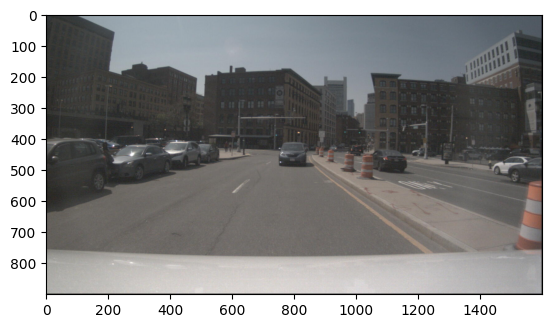

In [200]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()